## Method 1: Python Sort 

In [51]:
import pandas as pd

# This function calculates how much each debtor owes to the payer
def calculate_debts_python_sorted(expenses):
    balances = {}

    for expense in expenses:
        # The amount owed per debtor is the total amount divided by the number of debtors
        amount_per_debtor = expense.amount / len(expense.debtors)
        for debtor in expense.debtors:
            if debtor != expense.payer:  # Payer should not owe money to themselves
                # Update the debtor's balance
                balances[debtor] = balances.get(debtor, 0) - amount_per_debtor
                # Update the payer's balance
                balances[expense.payer] = balances.get(expense.payer, 0) + amount_per_debtor

    balances_copy = balances.copy()
    sorted_balances = sorted(balances_copy.items(), key=lambda x: x[1])
    debtors = 0
    credictors = len(sorted_balances) - 1
    transactions = []

    while any(x != 0 for x in [value for key, value in sorted_balances]) and debtors < credictors:
        debtor, debtor_balance = sorted_balances[debtors]
        creditor, creditor_balance = sorted_balances[credictors]

        if debtor_balance == 0:
            debtors += 1
            continue
        if creditor_balance == 0:
            creditors -= 1
            continue

        transfer_amount = min(-debtor_balance, creditor_balance)
        debtor_balance += transfer_amount
        creditor_balance -= transfer_amount

        transactions.append((debtor, creditor, transfer_amount))

        sorted_balances[debtors] = (debtor, debtor_balance)
        sorted_balances[credictors] = (creditor, creditor_balance)

        if debtor_balance == 0:
            debtors += 1
        if creditor_balance == 0:
            credictors -= 1

    return transactions




## Method 2: Merge Sort

In [52]:

def calculate_debts_merge_sort(expenses):
    balances = {}

    for expense in expenses:
        amount_per_debtor = expense.amount / len(expense.debtors)
        for debtor in expense.debtors:
            if debtor != expense.payer:  # Skip if the debtor is also the payer
                balances[debtor] = balances.get(debtor, 0) - amount_per_debtor
                balances[expense.payer] = balances.get(expense.payer, 0) + amount_per_debtor

    balances_copy = balances.copy()
    sorted_balances = list(merge_sort_dict_by_value(balances_copy).items())
    debtors = 0
    credictors = len(sorted_balances) - 1
    transactions = []

    while any(x != 0 for x in [value for key, value in sorted_balances]) and debtors < credictors:
        debtor, debtor_balance = sorted_balances[debtors]
        creditor, creditor_balance = sorted_balances[credictors]

        if debtor_balance == 0:
            debtors += 1
            continue
        if creditor_balance == 0:
            creditors -= 1
            continue

        transfer_amount = min(-debtor_balance, creditor_balance)
        debtor_balance += transfer_amount
        creditor_balance -= transfer_amount

        transactions.append((debtor, creditor, transfer_amount))

        sorted_balances[debtors] = (debtor, debtor_balance)
        sorted_balances[credictors] = (creditor, creditor_balance)

        if debtor_balance == 0:
            debtors += 1
        if creditor_balance == 0:
            credictors -= 1

    return transactions

def merge_sort(arr, compare_func=None):
    arr_temp = list(arr)
    n = len(arr_temp)    

    if n > 1: 
        mid = n // 2
        arr_temp_left = arr_temp[:mid] 
        arr_temp_right = arr_temp[mid:]
  
        arr_temp_left = merge_sort(arr_temp_left, compare_func)
        arr_temp_right = merge_sort(arr_temp_right, compare_func)
          
        i = j = k = 0
        n_left, n_right = len(arr_temp_left), len(arr_temp_right)
          
        while i < n_left and j < n_right: 
            if compare_func(arr_temp_left[i], arr_temp_right[j]):
                arr_temp[k] = arr_temp_left[i] 
                i += 1
            else: 
                arr_temp[k] = arr_temp_right[j] 
                j += 1
            k += 1
          
        while i < n_left: 
            arr_temp[k] = arr_temp_left[i] 
            i += 1
            k += 1
 
        while j < n_right: 
            arr_temp[k] = arr_temp_right[j] 
            j += 1
            k += 1
            
    return arr_temp
def merge_sort_dict_by_value(dictionary):
    def compare_dict_items(item1,item2):
        return item1[1] < item2[1]

    items = list(dictionary.items())
    sorted_items = merge_sort(items, compare_func=compare_dict_items)
    return dict(sorted_items)



## 3. Calculate time compexity depending on the number of transactions (10, 100,... , 10 million)

In [53]:
import timeit, random 
transaction_size = [10**i for i in range(1,8)]
people = ['Elena','Milton','Minho','Camilo','Monserrat','Gayatri','Guilia']
runtimes_python_sort = []
runtimes_merge_sort = []
number_of_optimal = []
class Expense:
    def __init__(self, payer, debtors, amount):
        self.payer = payer
        self.debtors = debtors
        self.amount = amount

for size in transaction_size:
    expenses = []
    for i in range(1,size):
        number_of_debtors = random.randint(1,len(people))
        debtors = random.sample(people, number_of_debtors)
        payer = random.choice(people)
        amount = random.randint(500,1000)
        expenses.append(Expense(payer,debtors,amount))
    runtime_python_sort = timeit.timeit(lambda: calculate_debts_python_sorted(expenses), number = 1)
    runtime_merge_sort = timeit.timeit(lambda: calculate_debts_merge_sort(expenses), number = 1)
    time_optimal = len(calculate_debts_merge_sort(expenses))
    number_of_optimal.append(time_optimal)
    runtimes_python_sort.append(runtime_python_sort)
    runtimes_merge_sort.append(runtime_merge_sort)
    

In [54]:
number_of_transactions = 10000000
tenmilion_to_optimal = calculate_debts_merge_sort(expenses)
print(f"We reduce {number_of_transactions} to {len(tenmilion_to_optimal)}")

We reduce 10000000 to 6


## 4. Comparison of two main algorithms

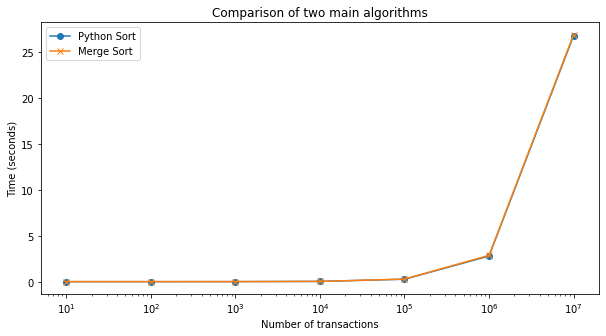

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(transaction_size, runtimes_python_sort, label='Python Sort', marker='o')
plt.plot(transaction_size, runtimes_merge_sort, label='Merge Sort', marker='x')
plt.xscale('log')
#plt.yscale('log')
plt.title('Comparison of two main algorithms')
plt.xlabel('Number of transactions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

## 5. Comparison of two main algorithms with Brute Force

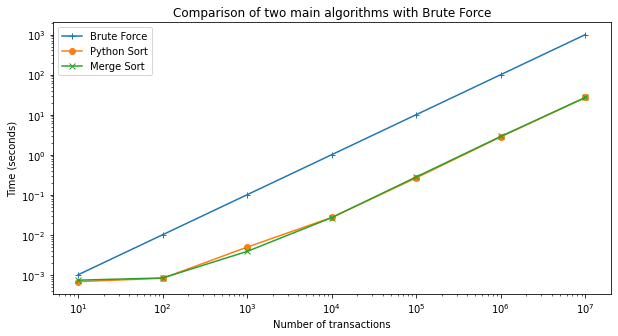

In [58]:
transaction_time = 0.0001
runtimes_brute_force = [transaction_time * x for x in transaction_size]
time_of_optimal_transaction = [transaction_time * x for x in number_of_optimal]
runtimes_python_sort_total = [x + y for x,y in zip(time_of_optimal_transaction, runtimes_python_sort)]
runtimes_merge_sort_total = [x + y for x,y in zip(time_of_optimal_transaction, runtimes_merge_sort)]


plt.figure(figsize=(10, 5))
plt.plot(transaction_size, runtimes_brute_force, label='Brute Force', marker = '+')
plt.plot(transaction_size, runtimes_python_sort_total, label='Python Sort', marker='o')
plt.plot(transaction_size, runtimes_merge_sort_total, label='Merge Sort', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.title('Comparison of two main algorithms with Brute Force')
plt.xlabel('Number of transactions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()
